In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [17]:
df_train = pd.read_csv(r'/home/ducanh/Credit Card Transactions Fraud Detection/Datasets/fraudTrain.csv')
df_test  = pd.read_csv(r'/home/ducanh/Credit Card Transactions Fraud Detection/Datasets/fraudTest.csv')
df = pd.concat([df_train, df_test])

/tmp/ipykernel_3046359/360099205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='coolwarm')


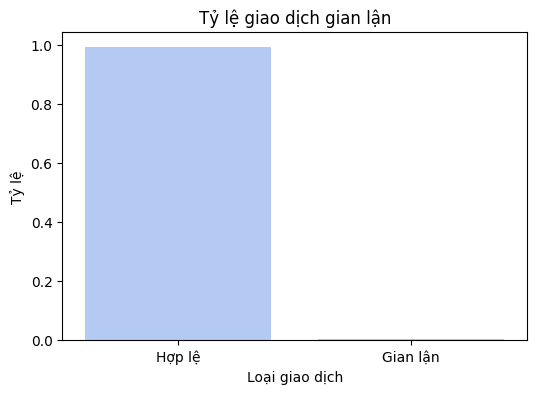

In [18]:
fraud_counts = df['is_fraud'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='coolwarm')
plt.xticks([0, 1], ['Hợp lệ', 'Gian lận'])
plt.xlabel("Loại giao dịch")
plt.ylabel("Tỷ lệ")
plt.title("Tỷ lệ giao dịch gian lận")
plt.show()

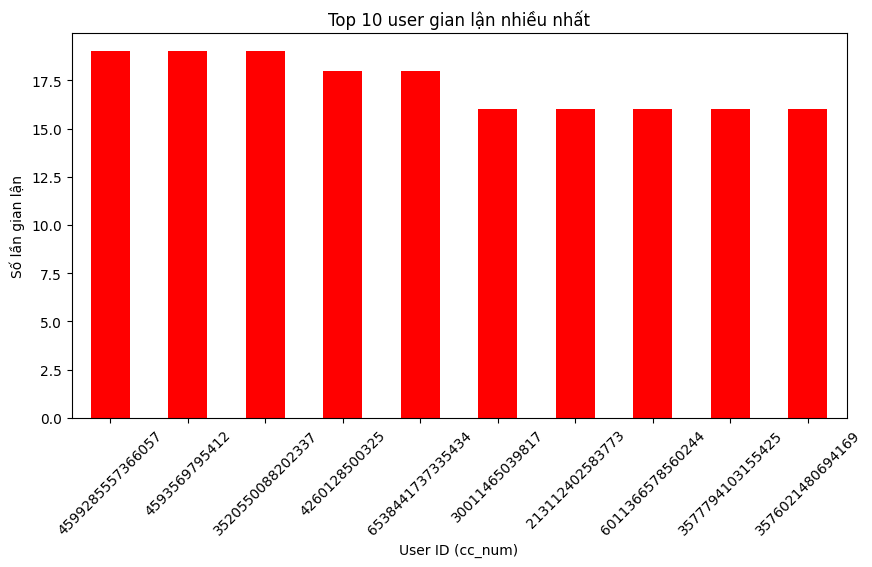

In [19]:
fraud_users = df[df['is_fraud'] == 1]['cc_num'].value_counts().head(10)
plt.figure(figsize=(10, 5))
fraud_users.plot(kind='bar', color='red')
plt.xlabel("User ID (cc_num)")
plt.ylabel("Số lần gian lận")
plt.title("Top 10 user gian lận nhiều nhất")
plt.xticks(rotation=45)
plt.show()

In [20]:
fraud_user_count = df[df['is_fraud'] == 1]['cc_num'].nunique()
print(f"Số lượng user có ít nhất một giao dịch gian lận: {fraud_user_count}")

Số lượng user có ít nhất một giao dịch gian lận: 976


In [21]:
df_fraud = df[df['is_fraud'] == 1].copy()
df_fraud.to_csv(r"/home/ducanh/Credit Card Transactions Fraud Detection/EDA/fraud_transactions.csv", index=False)

In [22]:
missing_values = df.isnull().sum()
print("Các cột có giá trị null:\n", missing_values[missing_values > 0])

Các cột có giá trị null:
 Series([], dtype: int64)


/tmp/ipykernel_3046359/1864077266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='amt', data=df, palette="coolwarm")


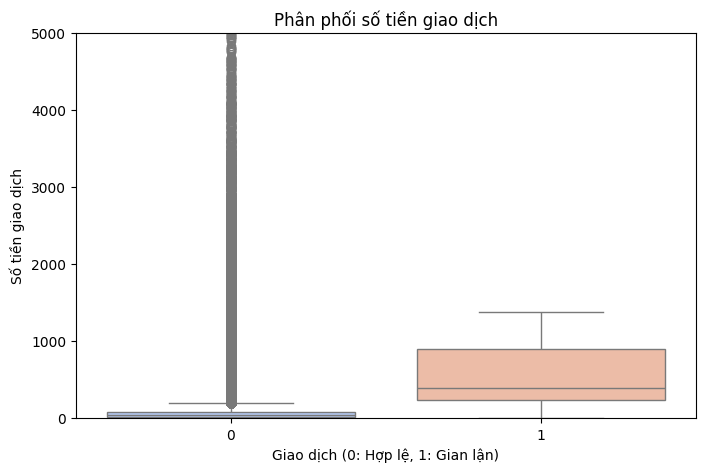

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='amt', data=df, palette="coolwarm")
plt.xlabel("Giao dịch (0: Hợp lệ, 1: Gian lận)")
plt.ylabel("Số tiền giao dịch")
plt.title("Phân phối số tiền giao dịch")
plt.ylim(0, 5000)  # Giới hạn để giảm ảnh hưởng của ngoại lệ
plt.show()

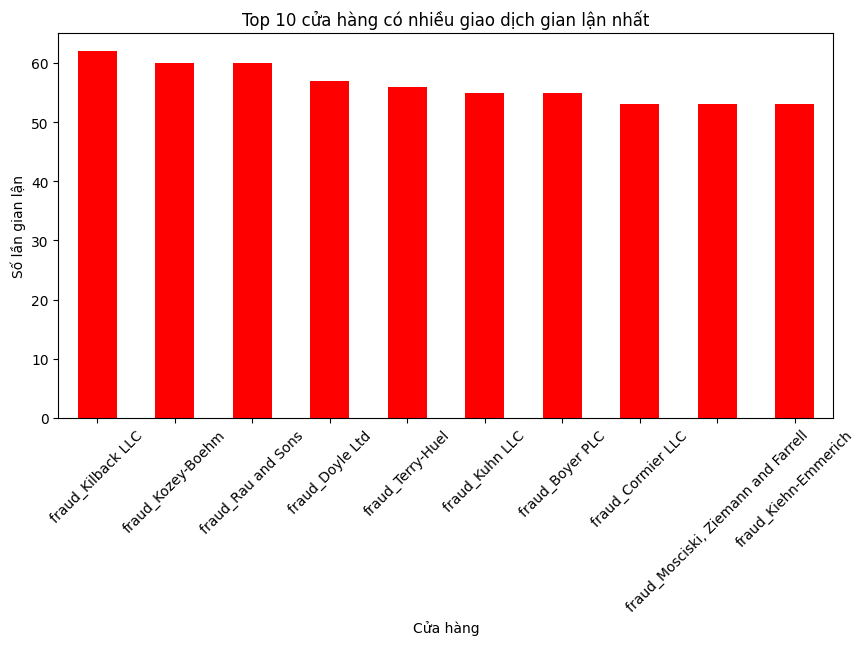

In [24]:
fraud_by_merchant = df[df['is_fraud'] == 1]['merchant'].value_counts().head(10)
plt.figure(figsize=(10,5))
fraud_by_merchant.plot(kind='bar', color='red')
plt.xlabel("Cửa hàng")
plt.ylabel("Số lần gian lận")
plt.title("Top 10 cửa hàng có nhiều giao dịch gian lận nhất")
plt.xticks(rotation=45)
plt.show()

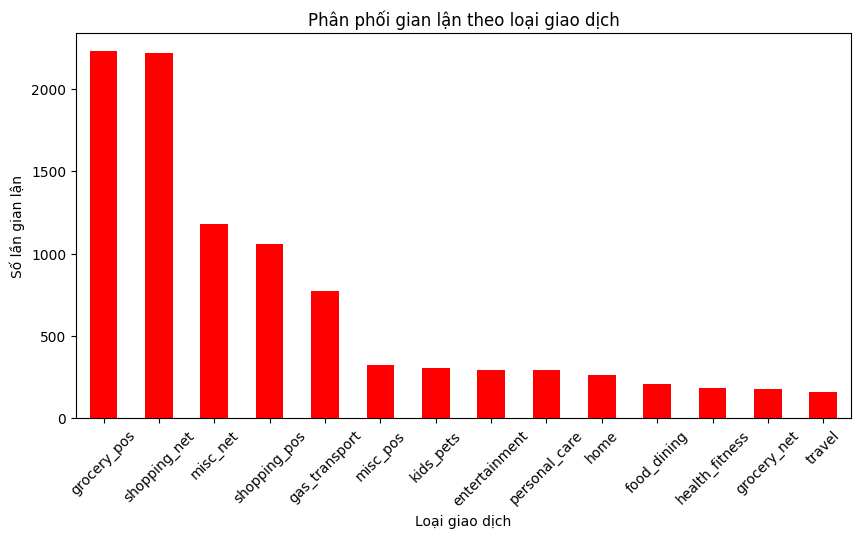

In [25]:
fraud_by_category = df[df['is_fraud'] == 1]['category'].value_counts()
plt.figure(figsize=(10, 5))
fraud_by_category.plot(kind='bar', color='red')
plt.xlabel("Loại giao dịch")
plt.ylabel("Số lần gian lận")
plt.title("Phân phối gian lận theo loại giao dịch")
plt.xticks(rotation=45)
plt.show()

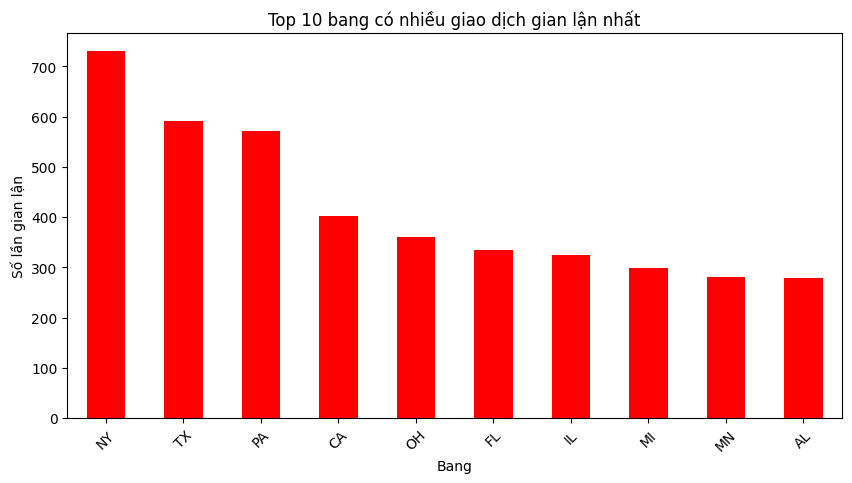

In [26]:
fraud_by_state = df[df['is_fraud'] == 1]['state'].value_counts().head(10)
plt.figure(figsize=(10, 5))
fraud_by_state.plot(kind='bar', color='red')
plt.xlabel("Bang")
plt.ylabel("Số lần gian lận")
plt.title("Top 10 bang có nhiều giao dịch gian lận nhất")
plt.xticks(rotation=45)
plt.show()

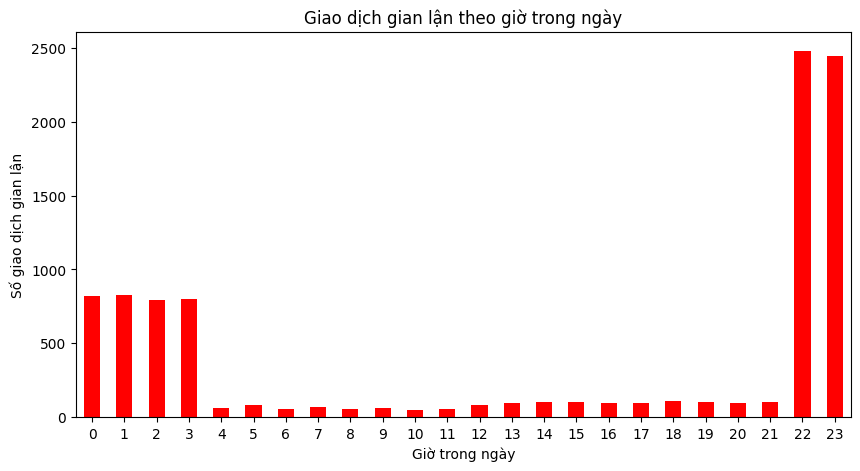

In [27]:
df['hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
fraud_by_hour = df[df['is_fraud'] == 1]['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
fraud_by_hour.plot(kind='bar', color='red')
plt.xlabel("Giờ trong ngày")
plt.ylabel("Số giao dịch gian lận")
plt.title("Giao dịch gian lận theo giờ trong ngày")
plt.xticks(rotation=0)
plt.show()

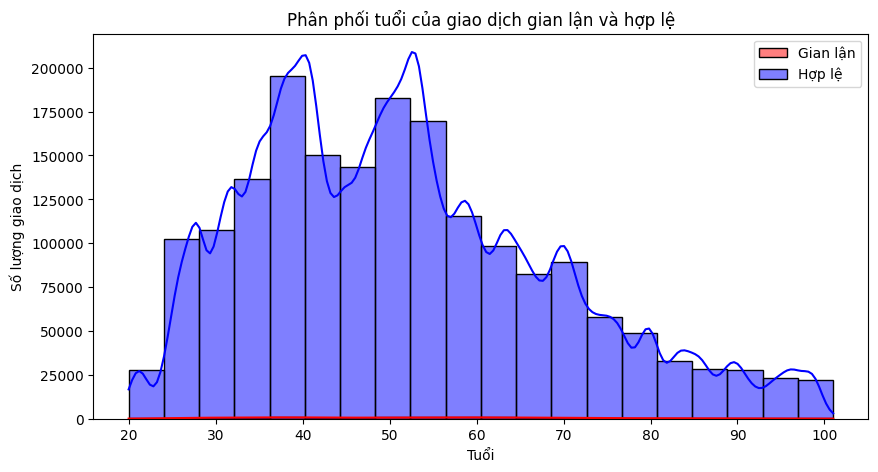

In [28]:
df['age'] = 2025 - pd.to_datetime(df['dob']).dt.year
plt.figure(figsize=(10, 5))
sns.histplot(df[df['is_fraud'] == 1]['age'], bins=20, kde=True, color='red', label="Gian lận")
sns.histplot(df[df['is_fraud'] == 0]['age'], bins=20, kde=True, color='blue', label="Hợp lệ")
plt.legend()
plt.xlabel("Tuổi")
plt.ylabel("Số lượng giao dịch")
plt.title("Phân phối tuổi của giao dịch gian lận và hợp lệ")
plt.show()

In [31]:
fraud_map = folium.Map(location=[df['merch_lat'].mean(), df['merch_long'].mean()], zoom_start=5)
fraud_locations = df[df['is_fraud'] == 1][['merch_lat', 'merch_long']].dropna()
for _, row in fraud_locations.iterrows():
    folium.CircleMarker(
        location=[row['merch_lat'], row['merch_long']],
        radius=3, color="red", fill=True, fill_color="red"
    ).add_to(fraud_map)
fraud_map